In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
y=df['MeanRun']
X=df.drop(columns ='MeanRun',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=5)

X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

print(y_val.shape)
print(X_val.shape)
print(y_train.shape)
print(X_train.shape)

(1, 79728)
(14, 79728)
(1, 161872)
(14, 161872)


# EXPERIMENT 1: Plotting training and validation cost against learning rates:

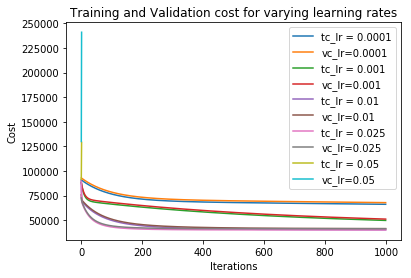

In [6]:
from LinearRegression_Threshold15 import *
Learning_rates= [.0001,.001,.01,.025,.05]
iterat =[]

for i in Learning_rates:   
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,i,1000,.0000000000001)
    iterat.append(len(cost_t))
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Training and Validation cost for varying learning rates')
    plt.legend()
    plt.show

In [7]:
iterat

[1000, 1000, 1000, 1000, 2]

In [12]:
cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,.001,1000,.000000001)
print("Best paramaters based on Gradient Descent:")
w
print("coefficient of MWG_Ordinal   : ", w[0,0])
print("coefficient of NWG_Ordinal   : ", w[0,1])
print("coefficient of KWG_Ordinal   : ", w[0,2])
print("coefficient of MDIMC_ordinal : ", w[0,3])
print("coefficient of NDIMC_ordinal : ", w[0,4])
print("coefficient of MDIMA_ordinal : ", w[0,5])
print("coefficient of NDIMB_ordinal : ", w[0,6])
print("coefficient of KWI_ordinal   : ", w[0,7])
print("coefficient of VWM_ordinal   : ", w[0,8])
print("coefficient of VWN_ordinal   : ", w[0,9])
print("coefficient of STRM_1        : ", w[0,10])
print("coefficient of STRN_1        : ", w[0,11])
print("coefficient of SA_1          : ", w[0,12])
print("coefficient of SB_1          : ", w[0,13])

Best paramaters based on Gradient Descent:
coefficient of MWG_Ordinal   :  -67.06746501852913
coefficient of NWG_Ordinal   :  -59.92932959582543
coefficient of KWG_Ordinal   :  8.006424676427923
coefficient of MDIMC_ordinal :  72.42484023396591
coefficient of NDIMC_ordinal :  71.58444670989446
coefficient of MDIMA_ordinal :  16.386403500242174
coefficient of NDIMB_ordinal :  16.454643252189374
coefficient of KWI_ordinal   :  9.822619311289301
coefficient of VWM_ordinal   :  -3.222352016932308
coefficient of VWN_ordinal   :  -0.2609782094517975
coefficient of STRM_1        :  3.8098614175642584
coefficient of STRN_1        :  4.461776350873831
coefficient of SA_1          :  14.635429922003379
coefficient of SB_1          :  14.441591911666254


In [13]:
cost_v[-1]

51085.760363374764

<function matplotlib.pyplot.show(*args, **kw)>

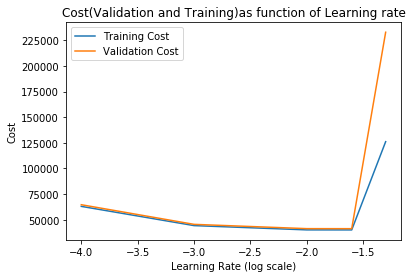

In [14]:

Learning_rates= [.0001,.001,.01,.025,.05]
learning =[]
cost_t_min =[]
cost_v_min =[]


for i in Learning_rates:   
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    learning.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(learning),cost_t_min,label='Training Cost')
plt.plot(np.log10(learning),cost_v_min,label='Validation Cost')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Cost')  
plt.title('Cost(Validation and Training)as function of Learning rate')
plt.legend()
plt.show

In [15]:
cost_t_min

[63052.48310625,
 44297.00347311175,
 40121.43523961449,
 40094.28081023246,
 126142.4088310718]

In [16]:
cost_v_min

[64668.625598434664,
 45517.80514281957,
 41339.48595079599,
 41308.25951170989,
 232877.17203597416]

# Experiment 2:
Plotting Cost of Training and Validation against varying Threshold

<function matplotlib.pyplot.show(*args, **kw)>

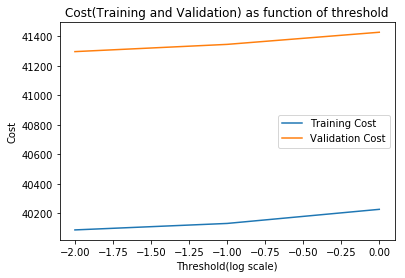

In [47]:
from LinearRegression_Threshold15 import *
threshold= [1,.1,.01]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,.025,20000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

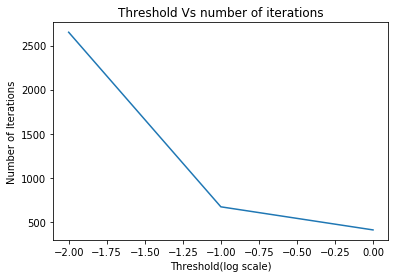

In [48]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show

In [49]:
iterate

[409, 671, 2651]

In [50]:
cost_t_min

[40226.23049670661, 40130.439142006224, 40086.45332717318]

In [51]:
cost_v_min

[41428.86959831195, 41346.462402695244, 41297.282648921646]

# EXPERIMENT 3 : Selecting 8 Random Features:

In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
y=df['MeanRun']
df.drop(columns ='MeanRun',axis=1,inplace = True)
X = df[df.columns.to_series().sample(8)]
X.columns


Index(['NDIMB_ordinal', 'SB_1', 'MDIMC_ordinal', 'STRN_1', 'KWI_ordinal',
       'KWG_Ordinal', 'NDIMC_ordinal', 'VWN_ordinal'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=5)

X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

print(y_val.shape)
print(X_val.shape)
print(y_train.shape)
print(X_train.shape)

(1, 79728)
(8, 79728)
(1, 161872)
(8, 161872)


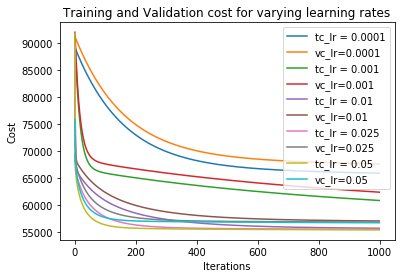

In [54]:
from LinearRegression_Threshold15 import *
Learning_rates= [.0001,.001,.01,.025,.05]


for i in Learning_rates:   
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,i,1000,.0000000000001)
    iterat.append(len(cost_t))
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Training and Validation cost for varying learning rates')
    plt.legend()
    plt.show

In [56]:
cost_t[-1]

55439.53078703219

In [57]:
cost_v[-1]

56758.53799244622

<function matplotlib.pyplot.show(*args, **kw)>

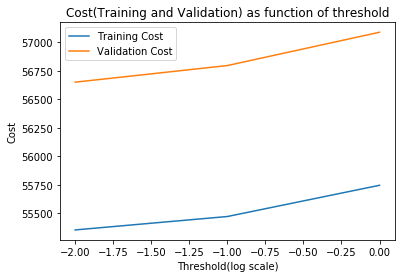

In [58]:
from LinearRegression_Threshold15 import *
threshold= [1,.1,.01]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,.025,20000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

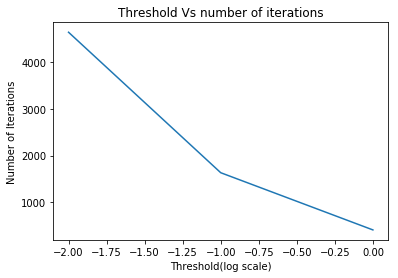

In [59]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show

In [60]:
iterate

[406, 1633, 4646]

In [61]:
cost_t_min


[55745.43698425569, 55471.376920236384, 55353.835451611536]

In [62]:
cost_v_min

[57088.09829369385, 56795.802088488, 56650.157651025474]

# Experiment - 4

In [ ]:
Based on the exploratory data analysis it appears that variables like VWN, VWM,NDIMB,MDIMB, and binary variables, all other variables have some values which always result in low run time. Based on this observation, selected following 8 features:
MWG_Ordinal
NWG_Ordinal
KWG_Ordinal
MDIMC_Ordinal
NDIMC_Ordinal
MDIMA_Ordinal
NDIMA_Ordinal
VWM_Ordinal


In [63]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
y=df['MeanRun']
df.drop(columns =['VWN_ordinal', 'STRM_1', 'STRN_1', 'SA_1', 'SB_1','MeanRun'],axis=1,inplace = True)
X.columns

Index(['NDIMB_ordinal', 'SB_1', 'MDIMC_ordinal', 'STRN_1', 'KWI_ordinal',
       'KWG_Ordinal', 'NDIMC_ordinal', 'VWN_ordinal'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=5)
X_train = X_train.T
y_train = np.array([y_train])
X_val=X_val.T
y_val=np.array([y_val])

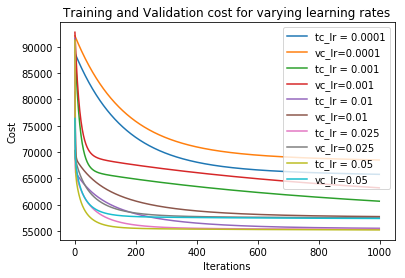

In [65]:
from LinearRegression_Threshold15 import *
Learning_rates= [.0001,.001,.01,.025,.05]


for i in Learning_rates:   
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,i,1000,.0000000000001)
    iterat.append(len(cost_t))
    plt.plot(cost_t,label='tc_lr = '+str(i))
    plt.plot(cost_v,label='vc_lr='+str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')  
    plt.title('Training and Validation cost for varying learning rates')
    plt.legend()
    plt.show

<function matplotlib.pyplot.show(*args, **kw)>

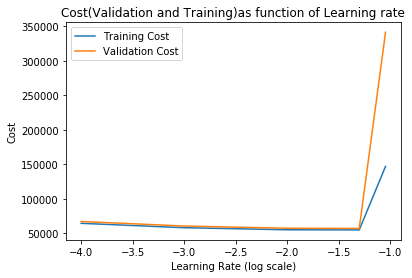

In [67]:
Learning_rates= [.0001,.001,.01,.025,.05,.09]
learning =[]
cost_t_min =[]
cost_v_min =[]


for i in Learning_rates:   
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,i,2000,.00000001)
    learning.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    

plt.plot(np.log10(learning),cost_t_min,label='Training Cost')
plt.plot(np.log10(learning),cost_v_min,label='Validation Cost')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Cost')  
plt.title('Cost(Validation and Training)as function of Learning rate')
plt.legend()
plt.show

In [69]:
cost_t_min

[64687.54571709286,
 58346.30843449334,
 55372.10932756401,
 55223.67573727617,
 55146.912443736575,
 147003.58109690645]

In [70]:
cost_v_min

[67356.32554566774,
 60777.42310535716,
 57573.047691540094,
 57398.08836344314,
 57297.67782697095,
 341150.81069722126]

<function matplotlib.pyplot.show(*args, **kw)>

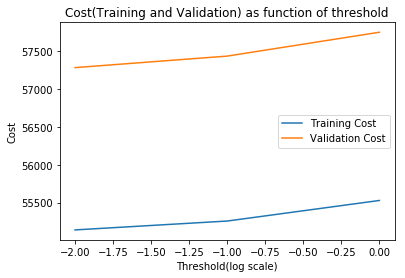

In [71]:
from LinearRegression_Threshold15 import *
threshold= [1,.1,.01]
thresh = []
cost_t_min =[]
cost_v_min =[]
iterate =[]
for i in threshold:
    cost_t,cost_v,w,iteration = linear_regression_model(X_train,y_train,X_val,y_val,.025,20000,i)
    thresh.append(i)
    cost_t_min.append(cost_t[-1])
    cost_v_min.append(cost_v[-1])
    iterate.append(iteration)
    
    

plt.plot(np.log10(thresh),cost_t_min,label='Training Cost')
plt.plot(np.log10(thresh),cost_v_min,label='Validation Cost')
plt.xlabel('Threshold(log scale)')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost(Training and Validation) as function of threshold')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

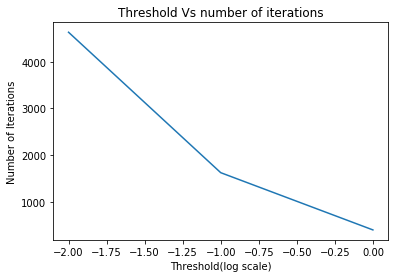

In [72]:
plt.plot(np.log10(thresh),iterate)
plt.xlabel('Threshold(log scale)')
plt.ylabel('Number of Iterations')

plt.title('Threshold Vs number of iterations')
plt.show

In [73]:
cost_t_min

[55528.13143567591, 55256.18548323135, 55138.70421381197]

In [74]:
cost_v_min

[57752.86359749219, 57437.367396287234, 57285.010757358425]

In [75]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")